In [1]:
import numpy as np
from tools.general import Trajectory, Display
from tools.gridsearch import DisplayGridSearch
from tools.linesearch import DisplayLineSearch

In [2]:
N_planets = 3
planet_radius = 0.1
gravity_constant = 0.1
traj_boundaries = np.array([[-1,1],[-1,1]])
dt = 0.01
Tmax = 100

traj = Trajectory(N_planets, planet_radius, gravity_constant, traj_boundaries, dt, Tmax)
planets_loc = traj.gen_planets(traj.bounds, 0.2) ; p0 = traj.gen_shuttle(0.2)

# uncomment and modify p0 to load a previously saved configuration
#p0 = np.array([0.0, 0.0]); planets_loc = np.load('save/planets_loc/[{}, {}].npy'.format(p0[0],p0[1])); traj.reset(p0,loc = planets_loc)

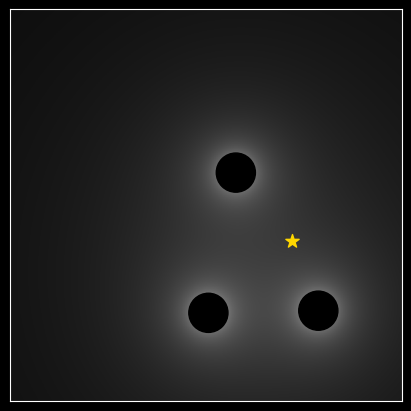

In [3]:
d = Display(traj)
d.plot_config()

In [4]:
n = 100

In [5]:
dg = DisplayGridSearch(traj,n)

1 maximum(s) - proposal [31, 27] : v = [-0.81,-0.27]


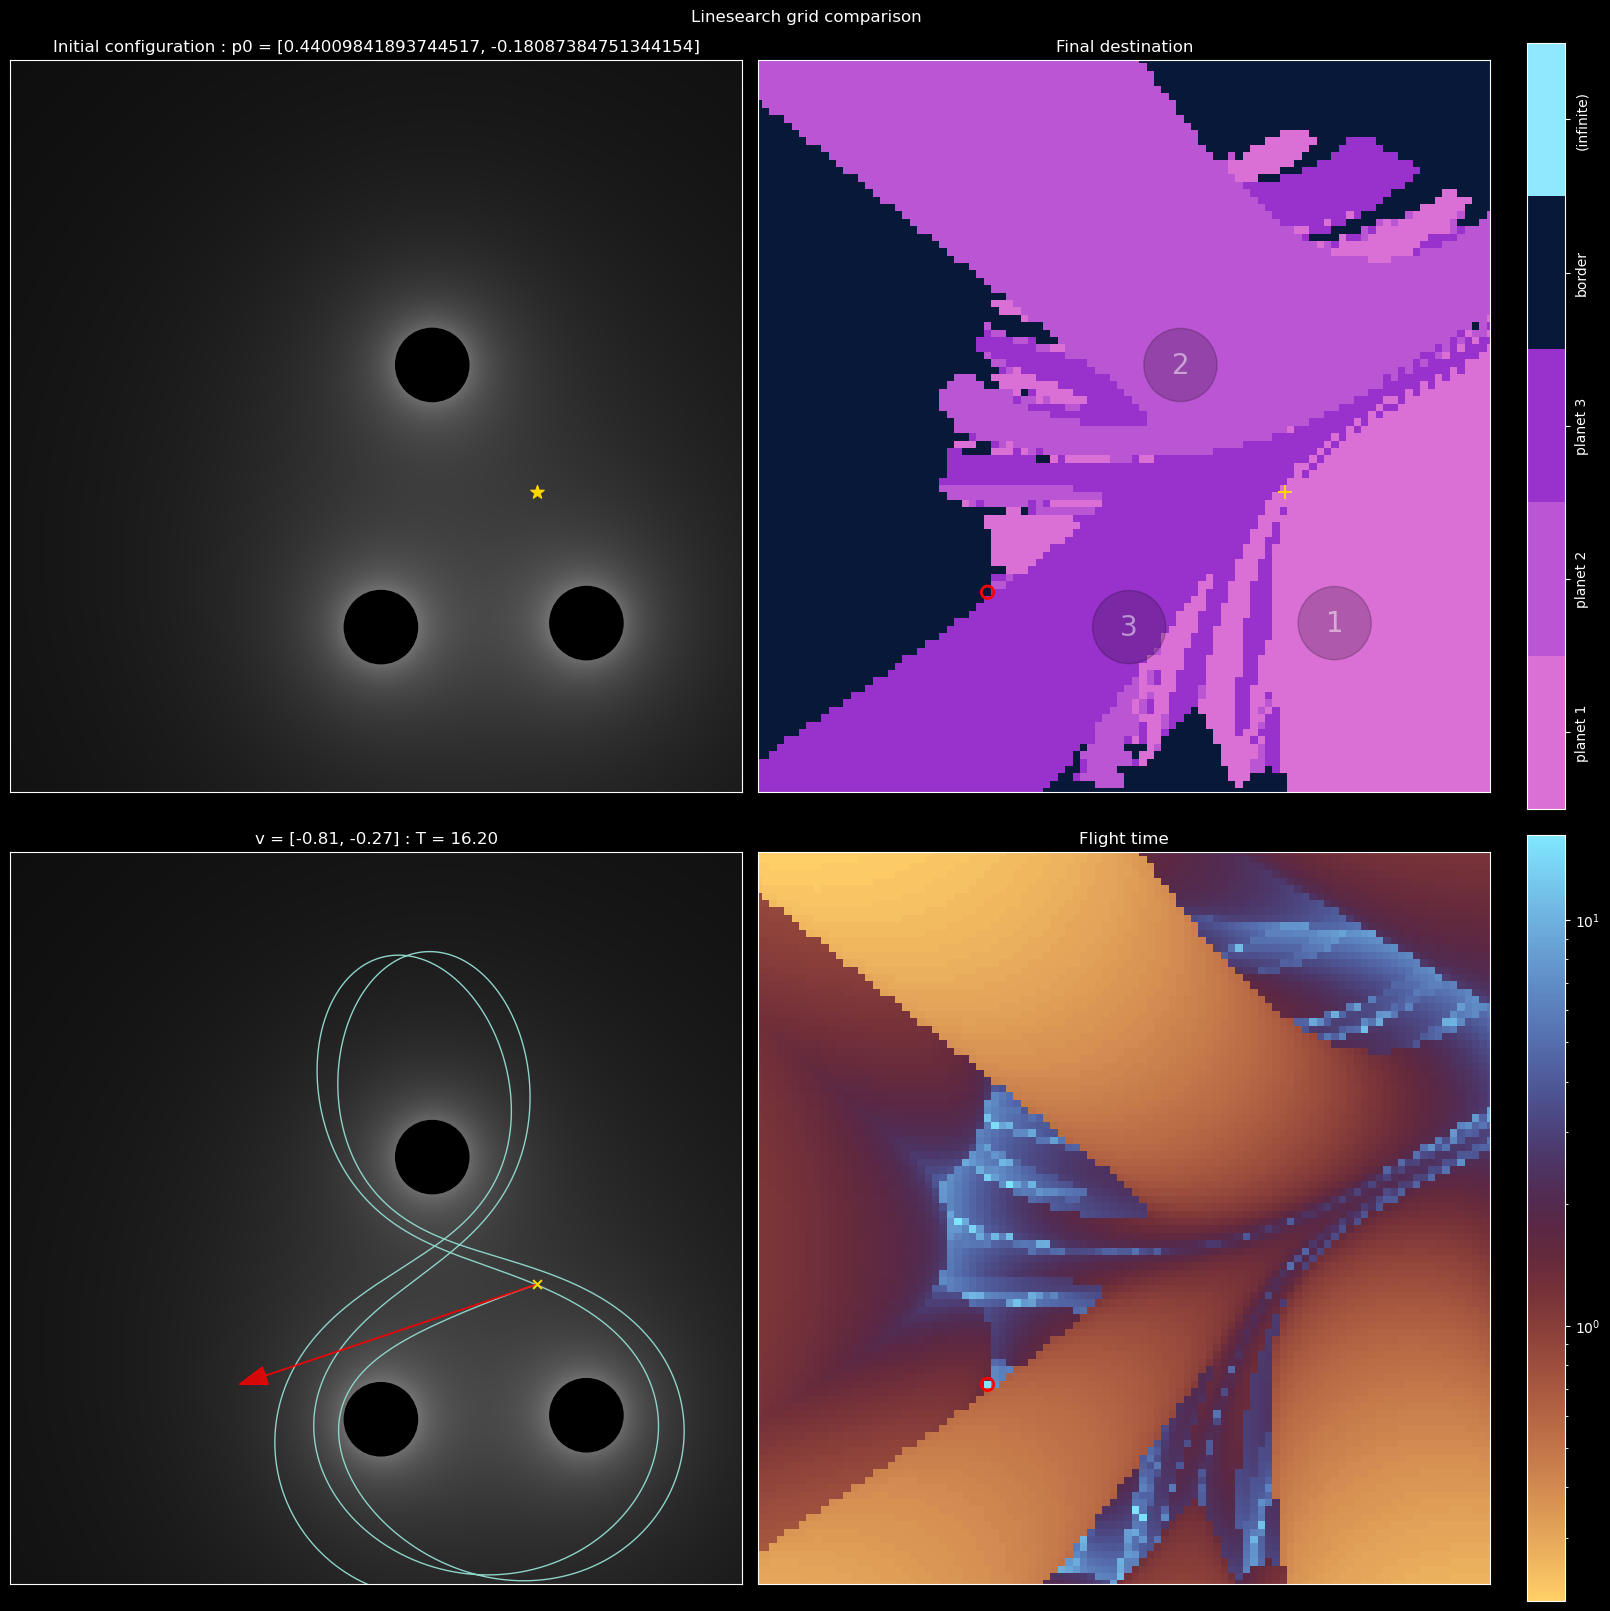

In [6]:
dg.plot4(save=True)

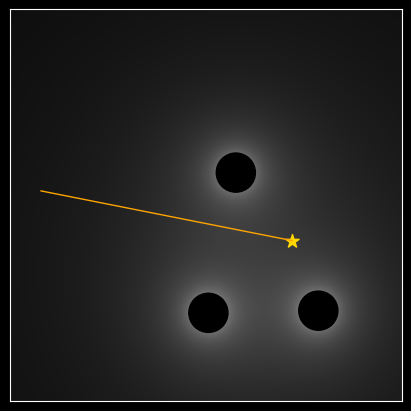

In [7]:
dl = DisplayLineSearch(traj,n*n)
dl.plot_ls_config()

In [8]:
dL = [DisplayLineSearch(traj,n*n,v1=dl.v0[0],v2=dl.v0[1]) for i in range(6)]
evals = np.array([dL[0].dicho_multisearch(), 
                  dL[1].mixed_mutlisearch(10), 
                  dL[2].mixed_mutlisearch(100),
                  dL[3].mixed_mutlisearch(1000),
                  dL[4].mixed_search(1000),
                  dL[5].uniform_search()])
titles = ['Dicho multisearch','mix multisearch 10','mix multisearch 100','mix multisearch 1000','mix 1000','uniform']

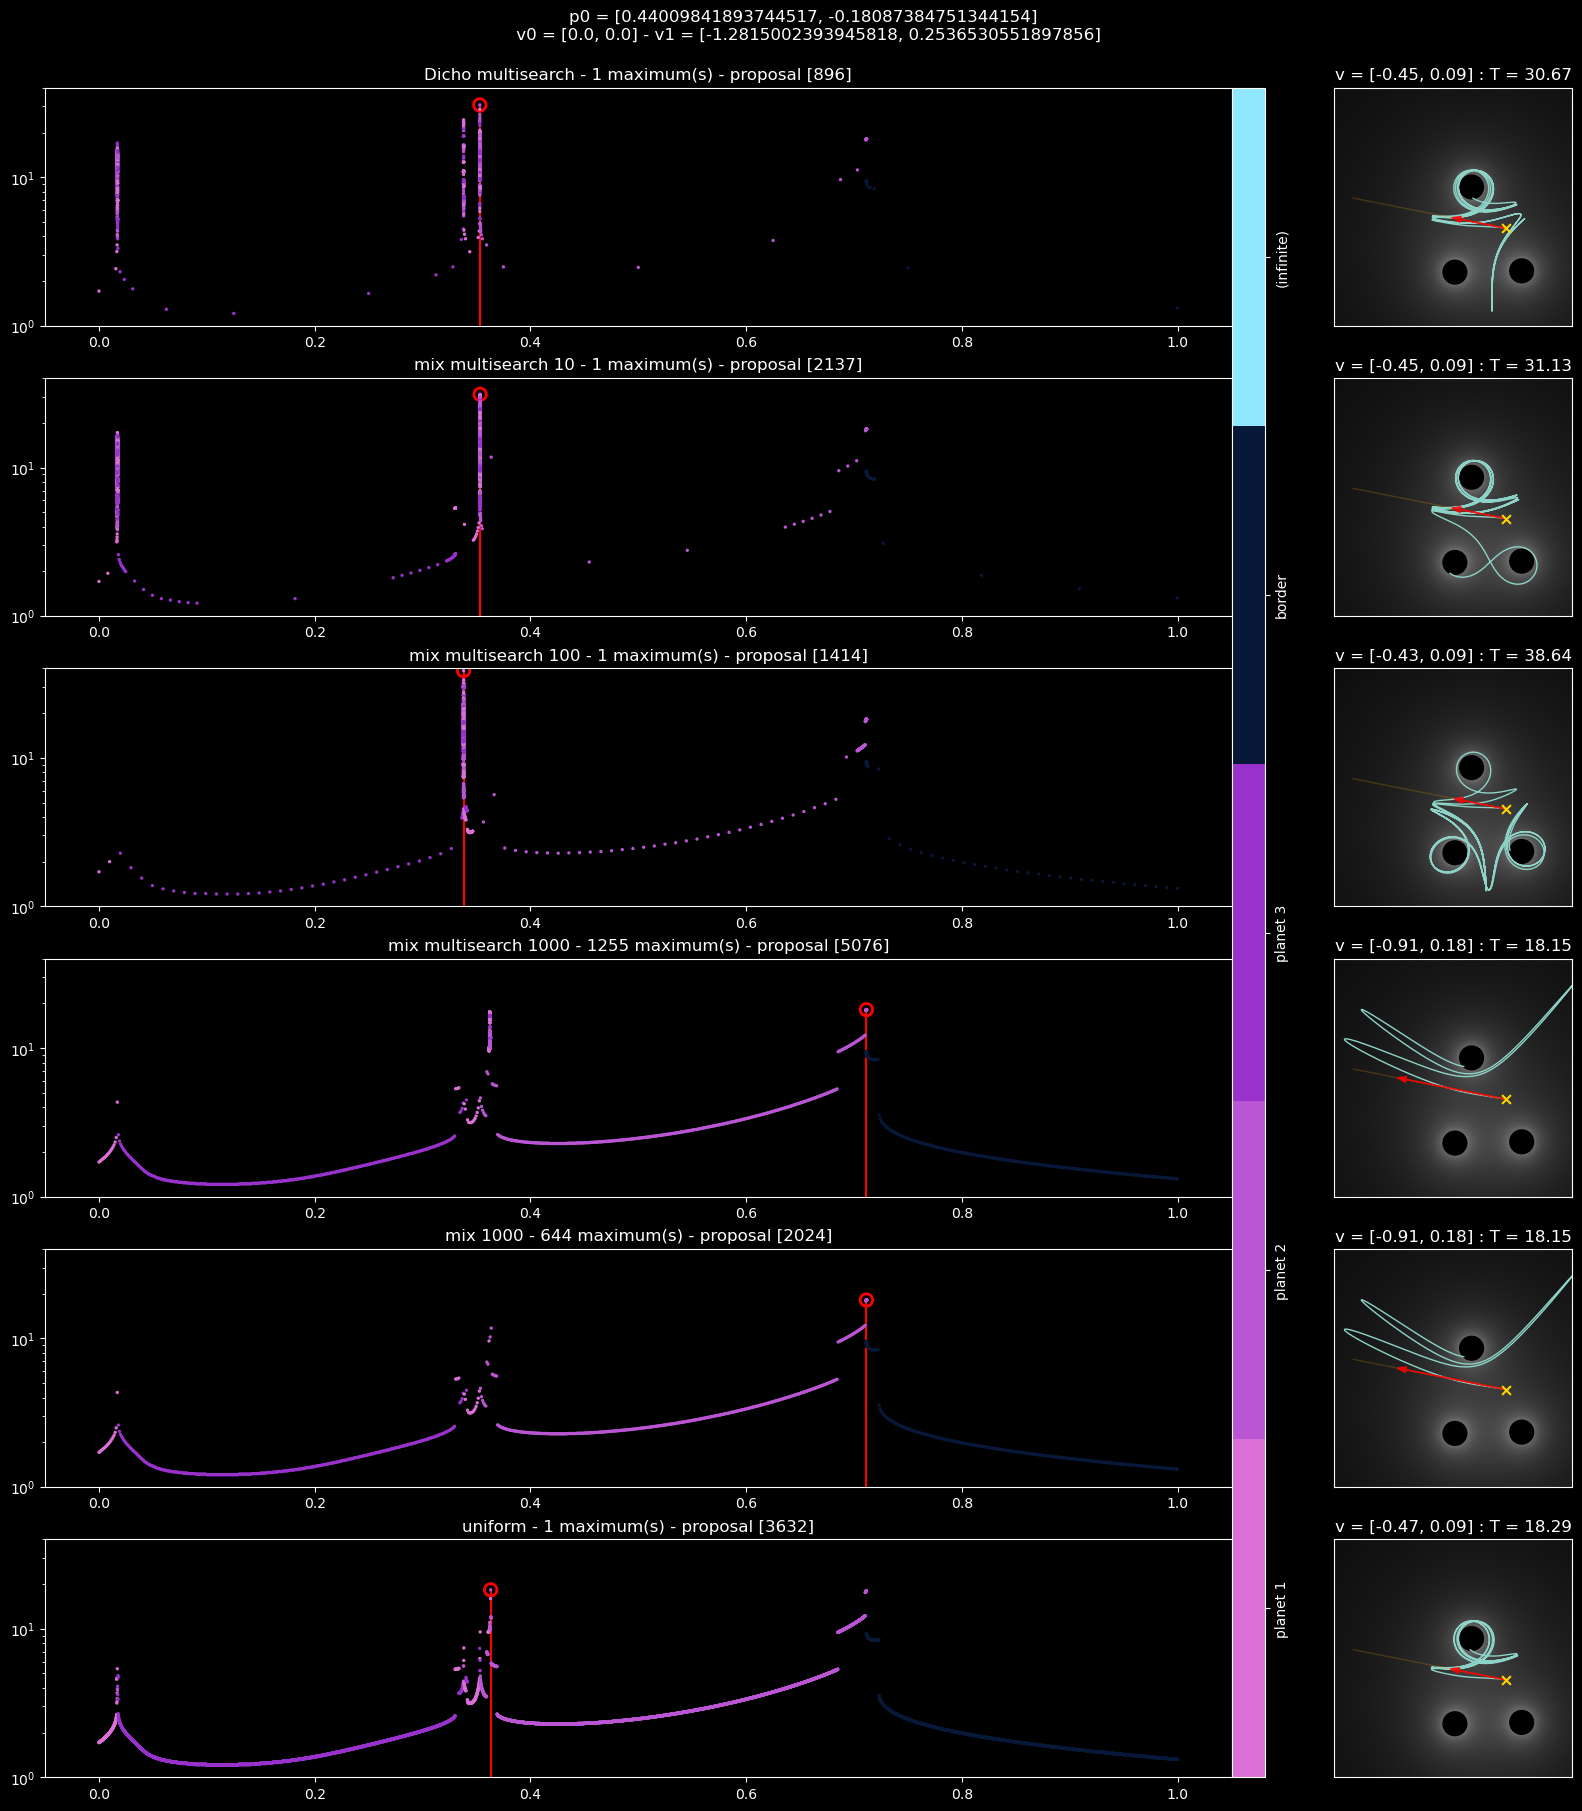

In [9]:
dl.plot_list(evals,titles,save=True)

In [10]:
dL[2].vbest_line()

1 maximum(s) - proposal [1414] : v = [-0.43,0.09]


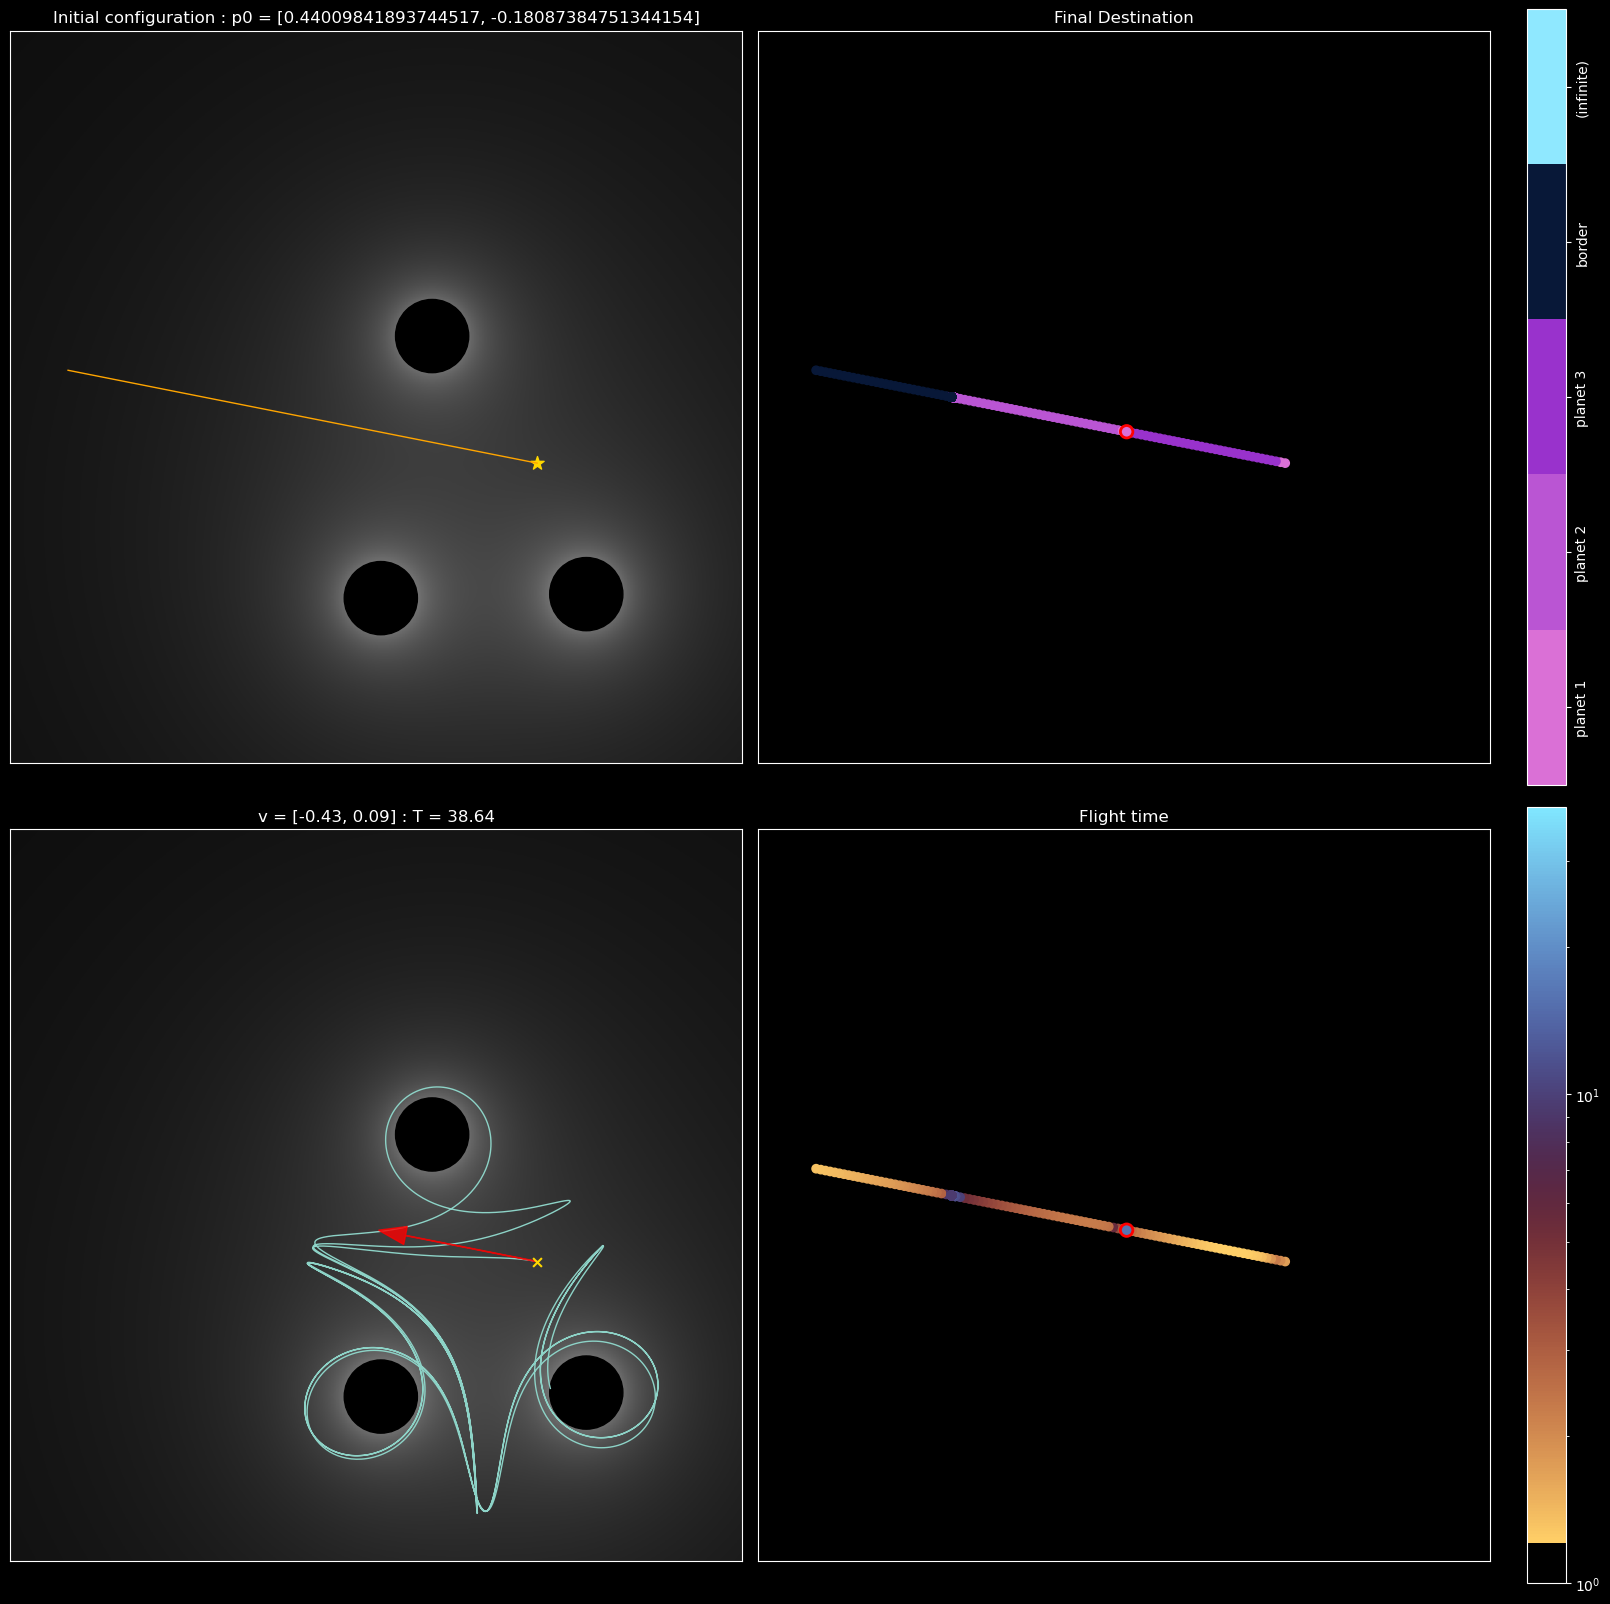

In [11]:
dL[2].plot4(save=False)